# Fashion MNIST 데이터셋

## 개요
Fashion MNIST는 전통적인 MNIST 데이터셋을 대체하기 위해 제안된 의류 이미지들로 구성된 데이터셋입니다. 이 데이터셋은 Zalando의 기사 이미지를 기반으로 하며, 기계 학습 모델의 벤치마킹과 알고리즘 테스트에 주로 사용됩니다. 각 이미지는 28x28 픽셀의 흑백 이미지이며, 총 10개의 다른 카테고리로 분류됩니다.

1. **T-shirt/top (티셔츠/탑)** - 일반적인 반팔 티셔츠 또는 탱크탑 형태의 의류.
2. **Trouser (바지)** - 일반적인 긴 바지.
3. **Pullover (풀오버)** - 머리를 통해 입을 수 있는 스웨터나 스웨트셔츠.
4. **Dress (드레스)** - 다양한 스타일과 길이의 여성용 드레스.
5. **Coat (코트)** - 보통 긴 소매와 열린 앞면을 가진 두꺼운 외투.
6. **Sandal (샌들)** - 발의 상당 부분을 드러내는 개방형 신발.
7. **Shirt (셔츠)** - 더 정장 스타일의, 주로 버튼이 있는 긴팔의 상의.
8. **Sneaker (스니커즈)** - 일반적으로 스포츠나 캐주얼 착용용도의 신발.
9. **Bag (가방)** - 다양한 스타일과 크기의 핸드백, 백팩, 지갑 등을 포함.
10. **Ankle boot (앵클 부츠)** - 발목까지 오는 길이의 부츠.


(링크: https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 구성
- **훈련 데이터**: 60,000개의 예제
- **테스트 데이터**: 10,000개의 예제
- **이미지 크기**: 28x28 픽셀
- **채널**: 흑백 (1채널)
- **라벨**: 10가지 패션 카테고리



### 1. Fashion MNIST 데이터 불러오기 및 전처리 데이터 불러오기 (전처리 포함)

코드 설명:

- 데이터 로딩: fashion_mnist.load_data() 함수를 사용해 MNIST 데이터셋을 로드합니다. 이 함수는 훈련 세트(X_train, y_train)와 테스트 세트(X_test, y_test)를 반환합니다.

- 데이터 전처리: 이미지 데이터(X_train, X_test)는 28x28 픽셀 크기로, 이를 784개의 피처로 일렬로 변환하고 255로 나누어 정규화합니다.

- 레이블 원-핫 인코딩: to_categorical 함수를 사용해 레이블을 원-핫 인코딩 형식으로 변환합니다. 이는 분류 문제에서 클래스 레이블을 효과적으로 처리하기 위함입니다.

In [10]:
import setuptools.dist
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# 데이터 불러오기
(훈련용_data, 훈련용_target), (테스트용_data, 테스트용_target) = fashion_mnist.load_data()

# 데이터 전처리
X_train = 훈련용_data.reshape(-1, 28*28).astype('float32') / 255
X_test = 테스트용_data.reshape(-1, 28*28).astype('float32') / 255

# 레이블 원-핫 인코딩
y_train = to_categorical(훈련용_target, 10)
y_test = to_categorical(테스트용_target, 10)

### 2. 모델 생성하기

코드 설명:

- Sequential 클래스: TensorFlow의 Sequential 클래스를 사용하여 모델을 생성합니다. 이 클래스는 레이어를 순차적으로 쌓아 올릴 수 있도록 합니다. 각 레이어는 입력 데이터를 받아 처리 후 출력 데이터를 다음 레이어로 전달합니다.

- Dense 레이어: Dense 레이어는 가장 기본적인 신경망 레이어로, 모든 입력 노드가 출력 노드와 연결되어 있습니다. 이 레이어는 다음과 같은 주요 매개변수를 포함합니다:

  - kernel_initializer = HeNormal(): He 초기값으로 해당 레이어를 초기화합니다.

  - units: 출력 공간의 차원을 설정합니다.

  - activation: 활성화 함수를 정의합니다. 여기서는 ReLU(Rectified Linear Unit)와 소프트맥스(softmax) 함수를 사용합니다.
      - ReLU는 음수를 0으로 만들고 양수는 그대로 출력하는 비선형 함수입니다.
      - Softmax는 다중 클래스 분류에서 사용되며, 출력 값을 확률 분포 형태로 변환합니다.

- BatchNormalization 레이어: 이 레이어는 입력 데이터의 평균을 0, 분산을 1로 정규화합니다. 이 과정은 모델이 각 레이어를 더 빠르고 안정적으로 학습할 수 있게 도와줍니다.

- Dropout 레이어: Dropout은 레이어의 출력 특성 중 일부를 무작위로 0으로 설정하여, 모델의 과적합을 방지하는 데 도움을 줍니다. rate 매개변수는 0으로 설정할 특성의 비율을 결정합니다.

In [11]:
# 필요한 라이브러리 import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal

# 모델 생성
model = Sequential([
    Dense(128, activation='relu', kernel_initializer=HeNormal(), input_shape=(784, )),
    BatchNormalization(),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

c:\Users\qq\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,330 (688.79 KB)

 Trainable params: 175,818 (686.79 KB)

 Non-trainable params: 512 (2.00 KB)

### 3. 모델 컴파일하기

코드 설명:

- 컴파일: 모델을 컴파일하는 단계에서는, 손실 함수로 'categorical_crossentropy'를 사용하고, 최적화 알고리즘으로 'adam'을 지정합니다.
  - 또한 평가 지표로 'accuracy'를 추가합니다.

In [12]:
# Adam 라이브러리 추가
from tensorflow.keras.optimizers import Adam

# Adam 최적화 알고리즘 인스턴스화 및 학습률 설정
optimizer = Adam(learning_rate=0.001)

# 모델 컴파일
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### 4. 모델 학습하기
코드 설명:

- 훈련: model.fit 메소드를 사용하여 모델을 훈련시킵니다. 여기서는 20번의 에폭 동안, 배치 크기를 128로 설정하고, 훈련 데이터의 20%를 검증 데이터로 사용합니다.

In [13]:
# 모델 학습
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7235 - loss: 0.8030 - val_accuracy: 0.8526 - val_loss: 0.4034
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8409 - loss: 0.4366 - val_accuracy: 0.8538 - val_loss: 0.3887
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8551 - loss: 0.3927 - val_accuracy: 0.8613 - val_loss: 0.3715
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8668 - loss: 0.3686 - val_accuracy: 0.8688 - val_loss: 0.3617
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8735 - loss: 0.3476 - val_accuracy: 0.8698 - val_loss: 0.3594
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8791 - loss: 0.3284 - val_accuracy: 0.8726 - val_loss: 0.3532
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8808 - loss: 0.3286 - val_accuracy: 0.8711 - val_loss: 0.3631
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8816 - loss: 0.3202 - val_accuracy: 0.

### 5. 모델 평가하기

코드 설명:

- 평가: model.predict 메소드를 사용하여 테스트 데이터셋의 피쳐을 기반으로 레이블을 예측합니다.
  - classification_report를 통해 모델의 성능을 확인합니다.

In [16]:
# 모델 평가(sklearn의 classification_report import)
from sklearn.metrics import classification_report

# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print('loss:', loss, 'accuracy:', accuracy)

predictions = model.predict(X_test)
predictions = predictions.argmax(axis=1)
y_true = y_test.argmax(axis=1)

# 분류 보고서 출력
print(classification_report(y_true, predictions))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8768 - loss: 0.3478
loss: 0.3505237400531769 accuracy: 0.8755999803543091
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1000
           1       0.95      0.98      0.96      1000
           2       0.77      0.83      0.80      1000
           3       0.91      0.83      0.87      1000
           4       0.78      0.83      0.80      1000
           5       0.97      0.96      0.96      1000
           6       0.70      0.64      0.67      1000
           7       0.94      0.95      0.94      1000
           8       0.96      0.98      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



### 6. 추론 결과 시각화

코드 설명:

- 테스트 데이터 샘플 추출: np.random.choice를 사용하여 무작위로 3개의 테스트 샘플을 선택합니다.

- 모델 예측 및 시각화:
  - 각 샘플에 대해 예측을 수행하고, 해당 샘플의 이미지와 예측된 숫자, 실제 레이블을 matplotlib를 사용하여 시각화합니다.
  - 각 클래스에 대한 예측 확률을 바 그래프로 표시하여 모델이 어떤 클래스에 대해 높은 확신을 가지고 예측하는지 확인합니다.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


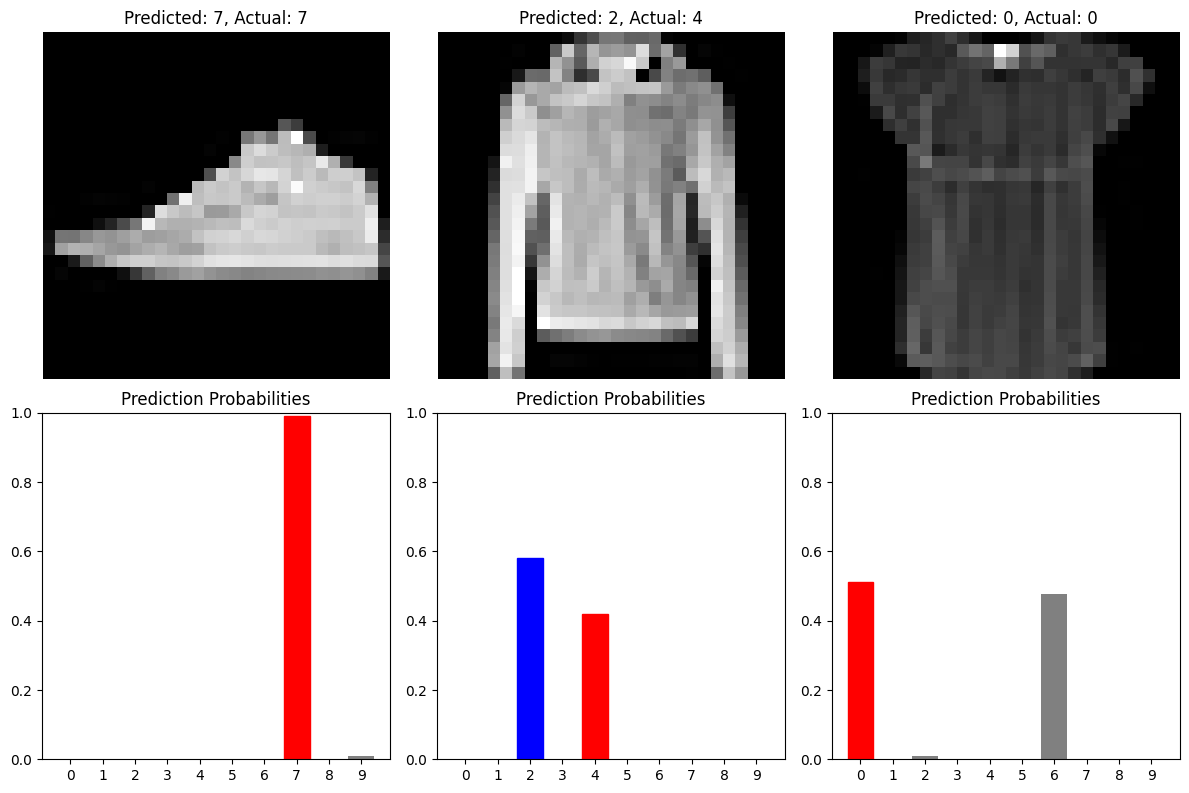

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 테스트 데이터에서 3개 샘플 추출
indices = np.random.choice(range(len(X_test)), 3)
samples = X_test[indices]
predictions = model.predict(samples)

# 예측 결과 및 확률 시각화
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i, (sample, prediction) in enumerate(zip(samples, predictions)):
    # 이미지 출력
    ax = axes[0, i]
    ax.imshow(sample.reshape(28, 28), cmap='gray')
    ax.set_title(f"Predicted: {np.argmax(prediction)}, Actual: {np.argmax(y_test[indices[i]])}")
    ax.axis('off')

    # 확률 바 그래프 출력
    ax = axes[1, i]
    bar_list = ax.bar(range(10), prediction, color='gray')
    bar_list[np.argmax(prediction)].set_color('blue')
    bar_list[np.argmax(y_test[indices[i]])].set_color('red')
    ax.set_ylim([0, 1])
    ax.set_xticks(range(10))
    ax.set_title("Prediction Probabilities")

plt.tight_layout()
plt.show()